# Preprocessing 

- loading in the data
- transforming the target variable into a numeric form
- doing a feature selection based on variance


In [39]:
import pandas as pd

In [40]:
df_train = pd.read_csv("amazon_review_ID.shuf.lrn.csv")

print(df_train.shape)

(750, 10002)


In [41]:
X = df_train.iloc[:, 1:10001].values
y = df_train.iloc[:,-1:].values

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder().fit(y.ravel())
y_enc = enc.transform(y.ravel())


In [42]:

import numpy as np
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.01 * (1 - 0.001)))
sel.fit_transform(X)

print('length of features before reduction')
print(len(X[1]))

selection = sel.get_support(indices=True)

#print('length of features before reduction')
#X = np.array(X)[:, selection]
#print(len(X[1]))

length of features before reduction
10000


#### doing a train test split

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.1, random_state=0)


##### normalizing the features

In [44]:
#normalizing the features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

In [45]:


from sklearn.linear_model import LogisticRegression
#creating the model
model = LogisticRegression(random_state=42, solver='newton-cg', warm_start=True, class_weight='balanced', intercept_scaling= 10, max_iter=1)
#model = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio = 0.5, max_iter=200)
#fitting data to the model
model.fit(X_train, y_train)



#calculating the probabilities
y_pred_proba = model.predict_proba(X_test)



#printing the accuarcy

accuracy_training_set = model.score(X_train, y_train)
print(accuracy_training_set)

accuracy_testing_set = model.score(X_test, y_test)
print(accuracy_testing_set)

1.0
0.64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


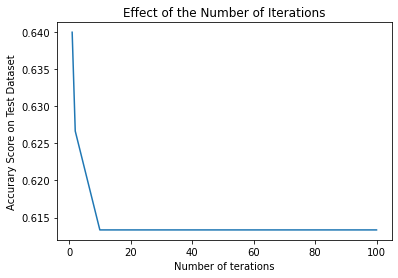

In [49]:
#trying to find the right number of iterations

import matplotlib.pyplot as plt

interations = [1, 2, 10, 50, 100]
scores = []
for interation in interations:
    model =  LogisticRegression(random_state=42, solver='newton-cg', warm_start=True, class_weight='balanced', intercept_scaling= 10, max_iter=interation)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
  
plt.title("Effect of the Number of Iterations")
plt.xlabel("Number of terations")
plt.ylabel("Accurary Score on Test Dataset")
plt.plot(interations, scores) 

In [34]:
#loading the test data
df_test = pd.read_csv("amazon_review_ID.shuf.tes.csv")
df_result = pd.read_csv("amazon_review_ID.shuf.tes.csv", usecols=['ID'])


#making a prediction for the test data
X_result = df_test.iloc[:, 1:10001].values
X_result = sc.transform(X_result)

y_result = model.predict(X_result)

#storing the results
result_enc = enc.inverse_transform(y_result)
df_result["Class"] = pd.Series(result_enc, index=df_result.index)
df_result.to_csv("result.csv", index=False)

In [35]:
df_result

,ID,Class
0,750,Power
1,751,Agresti
2,752,Comdet
3,753,Johnson
4,754,Cholette
...,...,...
745,1495,Brody
746,1496,Chandler
747,1497,Power
748,1498,Chandler


# SGD Classifier

In [85]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), SGDClassifier(loss='hinge', penalty='l2',max_iter=1000, tol=1e-3))
model.fit(X_train, y_train)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


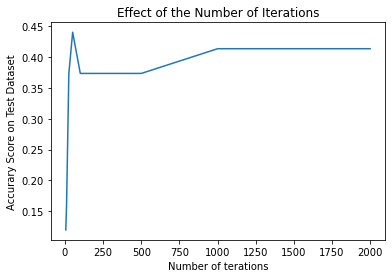

In [323]:
#trying to find the right number of iterations

import matplotlib.pyplot as plt

interations = [5, 10, 25, 50, 100, 500, 1000, 2000]
scores = []
for interation in interations:
    model = SGDClassifier(loss="log", penalty="l2", max_iter=interation)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
  
plt.title("Effect of the Number of Iterations")
plt.xlabel("Number of terations")
plt.ylabel("Accurary Score on Test Dataset")
plt.plot(interations, scores) 


In [87]:
#calculating the probabilities
y_pred_proba = model.decision_function(X_test)

#printing the accuarcy
accuracy_training_set = model.score(X_train, y_train)
print(accuracy_training_set)

accuracy_testing_set = model.score(X_test, y_test)
print(accuracy_testing_set)

1.0
0.48


## K Nearest neighbor

In [319]:



#creating the model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm = 'ball_tree', leaf_size=2)
#fitting data to the model
model.fit(X_train, y_train)

#calculating the probabilities
y_pred_proba = model.predict(X_test)


#printing the accuarcy
accuracy_training_set = model.score(X_train, y_train)
print(accuracy_training_set)

accuracy_testing_set = model.score(X_test, y_test)
print(accuracy_testing_set)


1.0
0.24


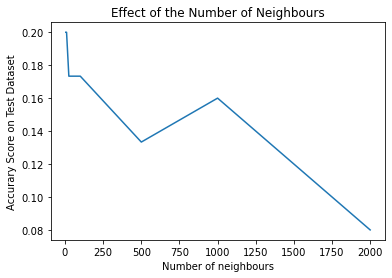

In [320]:
#trying to find the right number of neighbours

import matplotlib.pyplot as plt

neighbours = [2, 3, 5, 10, 25, 50,60, 100]
scores = []
for neighbour in neighbours:
    model = KNeighborsClassifier(n_neighbors=neighbour, weights='uniform')
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
  
plt.title("Effect of the Number of Neighbours")
plt.xlabel("Number of neighbours")
plt.ylabel("Accurary Score on Test Dataset")
plt.plot(interations, scores) 

### Support Vector Machine

In [304]:
from sklearn import svm


#creating the model
model = svm.SVC(decision_function_shape='ovo', kernel='linear')
#fitting data to the model
model.fit(X_train, y_train)

#calculating the probabilities
y_pred_proba = model.predict(X_test)


#printing the accuarcy
accuracy_training_set = model.score(X_train, y_train)
print(accuracy_training_set)

accuracy_testing_set = model.score(X_test, y_test)
print(accuracy_testing_set)



1.0
0.44


## Random Forest

In [50]:
#importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier

#creating the model
model = RandomForestClassifier(min_samples_split=4, min_samples_leaf=3, min_weight_fraction_leaf = 0.000000000000000001, bootstrap=True, n_estimators=7000)
#fitting data to the model
model.fit(X_train, y_train)

#calculating the probabilities
y_pred_proba = model.predict_proba(X_test)


#printing the accuarcy
accuracy_training_set = model.score(X_train, y_train)
print(accuracy_training_set)

accuracy_testing_set = model.score(X_test, y_test)
print(accuracy_testing_set)

1.0
0.6133333333333333


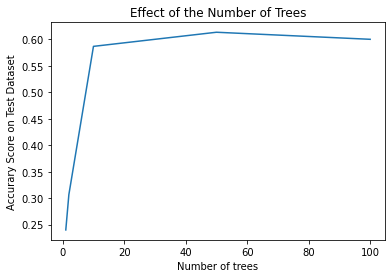

In [51]:
#trying to find the right number of trees

import matplotlib.pyplot as plt

trees = [5, 10, 100, 1000, 5000]
scores = []
for tree in trees:
    model = RandomForestClassifier(min_samples_split=4, min_samples_leaf=3, min_weight_fraction_leaf = 0.000000000000000001, bootstrap=True, n_estimators=tree)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
  
plt.title("Effect of the Number of Trees")
plt.xlabel("Number of trees")
plt.ylabel("Accurary Score on Test Dataset")
plt.plot(interations, scores) 


#### Grid Search

another approach for finding the right estimatiors for our random forest

In [321]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification


# Build a classification task using 3 informative features
X, y = make_classification(n_samples=753,
                           n_features=10000,
                           n_informative=753,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=5,
                           random_state=0,
                           shuffle=False)


rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
print(CV_rfc.best_params_)

{'max_features': 'auto', 'n_estimators': 300}


In [168]:
#loading the test data
df_test = pd.read_csv("amazon_review_ID.shuf.tes.csv")
df_result = pd.read_csv("amazon_review_ID.shuf.tes.csv", usecols=['ID'])


#making a prediction for the test data
X_result = df_test.iloc[:, 1:10001].values
X_result = sc.transform(X_result)

y_result = model.predict(X_result)

#storing the results
result_enc = enc.inverse_transform(y_result)
df_result["Class"] = pd.Series(result_enc, index=df_result.index)
df_result.to_csv("result.csv", index=False)

In [169]:
df_result

,ID,Class
0,750,Power
1,751,Koenig
2,752,Comdet
3,753,Johnson
4,754,Cholette
...,...,...
745,1495,Shea
746,1496,Chandler
747,1497,Power
748,1498,Grove


# Keras RNN

In [93]:
#see how many classes (persons) we have

len(df_train['Class'].unique())

50

In [94]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SimpleRNN

In [96]:

model = Sequential()

model.add(Dense(30, input_dim=10000, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))


#model.add(Dense(50, input_dim=10000, activation='softmax', name='FC1', input_shape=(10000,)))
#model.add(Activation('relu'))
#model.add(Dense(50,name='out_layer'))
#model.add(Activation('sigmoid'))
#model.add(Dropout(0.5))


In [97]:
model.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])
#model.fit(X_train, y_train, epochs=10, verbose=1)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#model.fit(X_train, y_train, epochs=100, verbose=1)


model.fit(X_train,y_train.ravel(),batch_size=50,epochs=100, validation_split=0.1)

Epoch 1/100
11/11 [==============================] - 1s 17ms/step - loss: 7.7677 - accuracy: 0.0260 - val_loss: 18.0635 - val_accuracy: 0.0167
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: -20.7570 - accuracy: 0.0320 - val_loss: 22.1808 - val_accuracy: 0.0167
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: -38.9395 - accuracy: 0.0246 - val_loss: 30.7377 - val_accuracy: 0.0167
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: -48.9276 - accuracy: 0.0299 - val_loss: 40.8105 - val_accuracy: 0.0167
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: -60.3047 - accuracy: 0.0340 - val_loss: 50.9088 - val_accuracy: 0.0167
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: -73.6418 - accuracy: 0.0295 - val_loss: 60.8815 - val_accuracy: 0.0167
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: -81.2514 - accuracy: 0.0278 - val_loss: 69.4360 - val_accuracy: 

Epoch 57/100
11/11 [==============================] - 0s 5ms/step - loss: -455.7823 - accuracy: 0.0463 - val_loss: 341.3787 - val_accuracy: 0.0167
Epoch 58/100
11/11 [==============================] - 0s 5ms/step - loss: -476.4658 - accuracy: 0.0374 - val_loss: 344.8644 - val_accuracy: 0.0167
Epoch 59/100
11/11 [==============================] - 0s 5ms/step - loss: -489.7604 - accuracy: 0.0304 - val_loss: 348.3940 - val_accuracy: 0.0167
Epoch 60/100
11/11 [==============================] - 0s 5ms/step - loss: -491.9255 - accuracy: 0.0523 - val_loss: 352.5991 - val_accuracy: 0.0167
Epoch 61/100
11/11 [==============================] - 0s 5ms/step - loss: -496.1343 - accuracy: 0.0363 - val_loss: 356.0252 - val_accuracy: 0.0167
Epoch 62/100
11/11 [==============================] - 0s 5ms/step - loss: -502.8584 - accuracy: 0.0426 - val_loss: 358.9185 - val_accuracy: 0.0167
Epoch 63/100
11/11 [==============================] - 0s 5ms/step - loss: -510.8116 - accuracy: 0.0447 - val_loss: 364